# Построение и исследование характеристик датчиков базовых СВ

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from scipy.stats import chisquare, kstest
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def corr_test_plot(x, y):
    n = len(x)
    _ = plt.figure(figsize=(10, 8))
    plt.plot([0, n], [0, 0], lw=2, c='r')
    sample_size = np.arange(2, n)
    coeffs = [np.corrcoef(x[:s], y[:s])[0][1] for s in sample_size]
    plt.scatter(sample_size, coeffs, c='b', alpha=0.5)
    plt.title('Linear independence test', size=16, pad=8)
    plt.xlabel('Sample size')
    plt.ylabel('Pearson correlation coefficient')
    plt.show()
    
def rfreq_plot(x, k):
    n = len(x)
    _ = plt.figure(figsize=(8, 6))
    plt.plot([0, 1], [1/k, 1/k], c='b')
    plt.hist(x, bins=k, edgecolor='k', weights=[1/n]*n, color='b', alpha=0.3)
    plt.title('Relative frequency histogram')
    plt.xlabel('x')
    plt.ylabel('Relative frequency (ni / n)')
    plt.show()

## 1. Метод середины квадрата

In [3]:
class MiddleSquareRandom:
    """Pseudo random generator with the middle square method.
    """
    
    def __init__(self, seed):
        self.seed(seed)
        
    def seed(self, n):
        m = len(str(abs(n)))
        if m % 2:
            raise ValueError("n must have even number of digits")
        self._norm = int('1'.ljust(m+1, '0'))
        self._state = n
        self._fill = 2*m
        self._leftn = m // 2
        self._rightn = 3*self._leftn
        
    def rand(self, size=None):
        if size is None:
            return self._random()
        else:
            return [self._random() for _ in range(size)]
    
    def _random(self):
        self._state = int(str(self._state**2).zfill(self._fill)[self._leftn:self._rightn])
        return self._state / self._norm

In [4]:
ms_random = MiddleSquareRandom(1994)

In [5]:
ms_random.rand(10)

[0.976, 0.2576, 0.6357, 0.4114, 0.9249, 0.544, 0.5936, 0.236, 0.5696, 0.4444]

### Тестирование равномерности

In [6]:
ms_random.seed(9828198741)

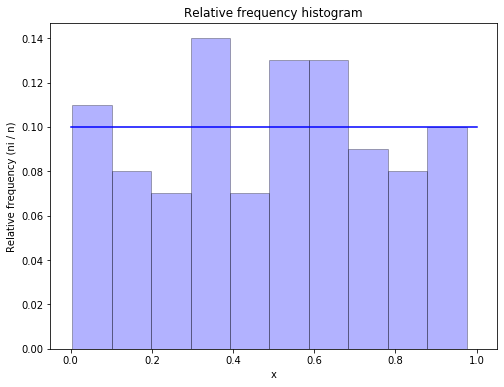

In [7]:
rfreq_plot(ms_random.rand(100), 10)

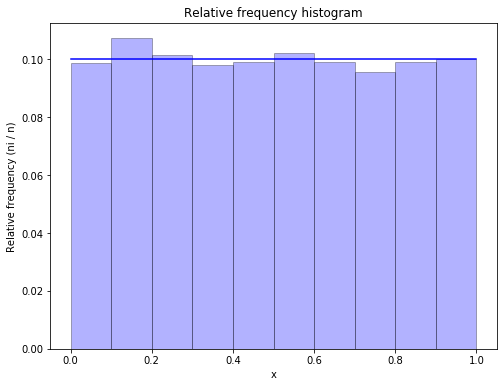

In [9]:
rfreq_plot(ms_random.rand(10000), 10)

In [10]:
ms_sample = ms_random.rand(10000)
print(f'sample_mean = {np.mean(ms_sample)}, sample_var = {np.var(ms_sample)}')

sample_mean = 0.50154546300846, sample_var = 0.08268279717245823


### chi-square and kolmogorov-smirnov test

In [11]:
ms_sample = ms_random.rand(1000)

In [12]:
chisquare(np.histogram(ms_sample)[0])

Power_divergenceResult(statistic=7.88, pvalue=0.5462832105527575)

In [13]:
kstest(ms_sample, 'uniform')

KstestResult(statistic=0.03303771, pvalue=0.22048891977724852)

Tests don't reject the hypothesis that the sample came from the uniform distribution

### Тестирование линейной независимости

In [26]:
ms_random.seed(9828187921)

In [27]:
n = 10000
ms_z1 = ms_random.rand(n)
ms_z2 = ms_random.rand(n)

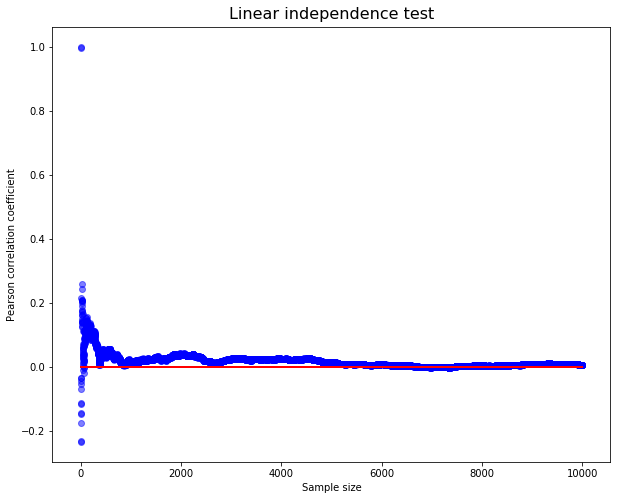

In [28]:
corr_test_plot(ms_z1, ms_z2)

## 2. Мультипликативный конгруэнтный метод

In [229]:
class MCG:
    """Multiplicative congruential generator.
    """
    
    def __init__(self, seed, k=279470273, m=0xfffffffb):
        self.seed(seed, k, m)
        
    def seed(self, seed, k=279470273, m=0xfffffffb):
        self._k = k
        self._mod = m
        self._state = seed
        pass
        
    def rand(self, n=None):
        if n is None:
            return self._random()
        else:
            return [self._random() for _ in range(n)]
    
    def _random(self):
        self._state = (self._k*self._state) % self._mod
        return self._state / self._mod

In [267]:
mcg_random = MCG(89739337)

### Тестирование равномерности

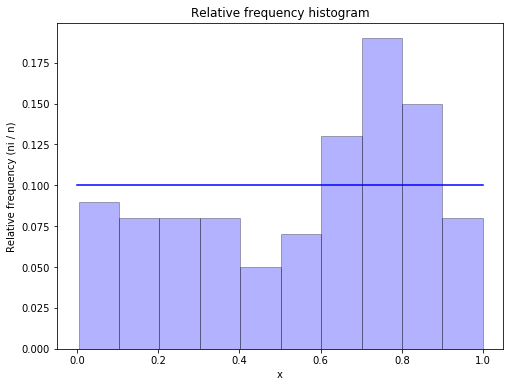

In [268]:
rfreq_plot(mcg_random.rand(100), 10)

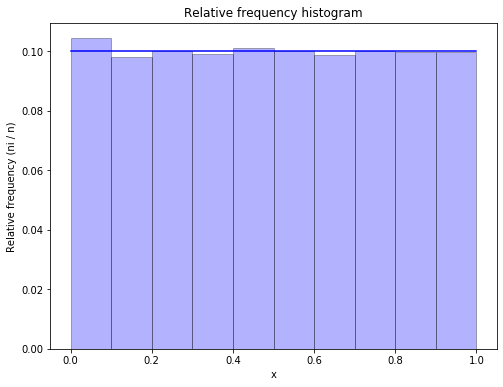

In [269]:
rfreq_plot(mcg_random.rand(10000), 10)

In [270]:
mcg_sample = mcg_random.rand(10000)
print(f'sample_mean = {np.mean(mcg_sample)}, sample_var = {np.var(mcg_sample)}')

sample_mean = 0.5018399474132805, sample_var = 0.08375838866302858


### chi-square and kolmogorov-smirnov test

In [271]:
n = 1000
mcg_sample = mcg_random.rand(n)

In [272]:
chisquare(np.histogram(mcg_sample)[0])

Power_divergenceResult(statistic=4.28, pvalue=0.8920362631718506)

In [273]:
kstest(mcg_sample, 'uniform')

KstestResult(statistic=0.02119166289338803, pvalue=0.7601939157578856)

Tests don't reject the hypothesis that the sample came from the uniform distribution

### Тестирование линейной независимости

In [274]:
n = 10000
mcg_z1 = mcg_random.rand(n)
mcg_z2 = mcg_random.rand(n)

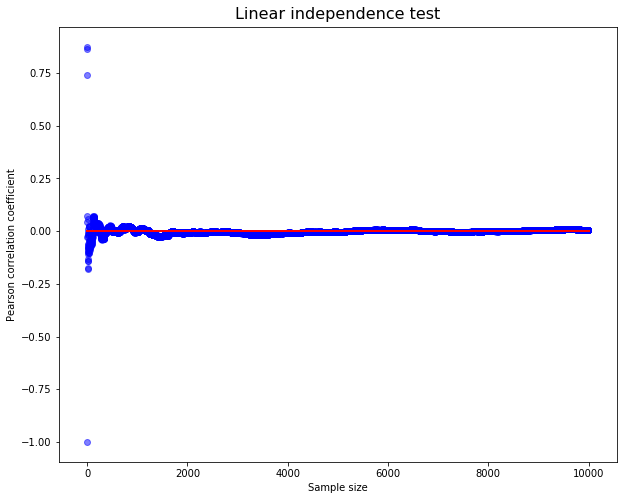

In [275]:
corr_test_plot(mcg_z1, mcg_z2)